In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [32]:
final_df = pd.read_csv("data/final_df.csv")


In [44]:
top_5_crime_values = final_df.groupby("city_state")[["total_crime", "value"]].mean().nlargest(5, "total_crime")
top_5_crime_values_df = final_df[final_df["city_state"].isin(top_5_crime_values.index)]
top_5_crime_values_df = top_5_crime_values_df.groupby(["year", "city_state"])[["total_crime", "value"]].mean().reset_index()
top_5_crime_values_df.head()

,year,city_state,total_crime,value
0,2014,"Chicago, IL",86708.0,310903.472856
1,2014,"Houston, TX",185170.0,216353.880094
2,2014,"Memphis, TN",69109.0,97828.101122
3,2014,"Philadelphia, PA",76679.0,194311.835938
4,2014,"Phoenix, AZ",64304.0,200511.669033


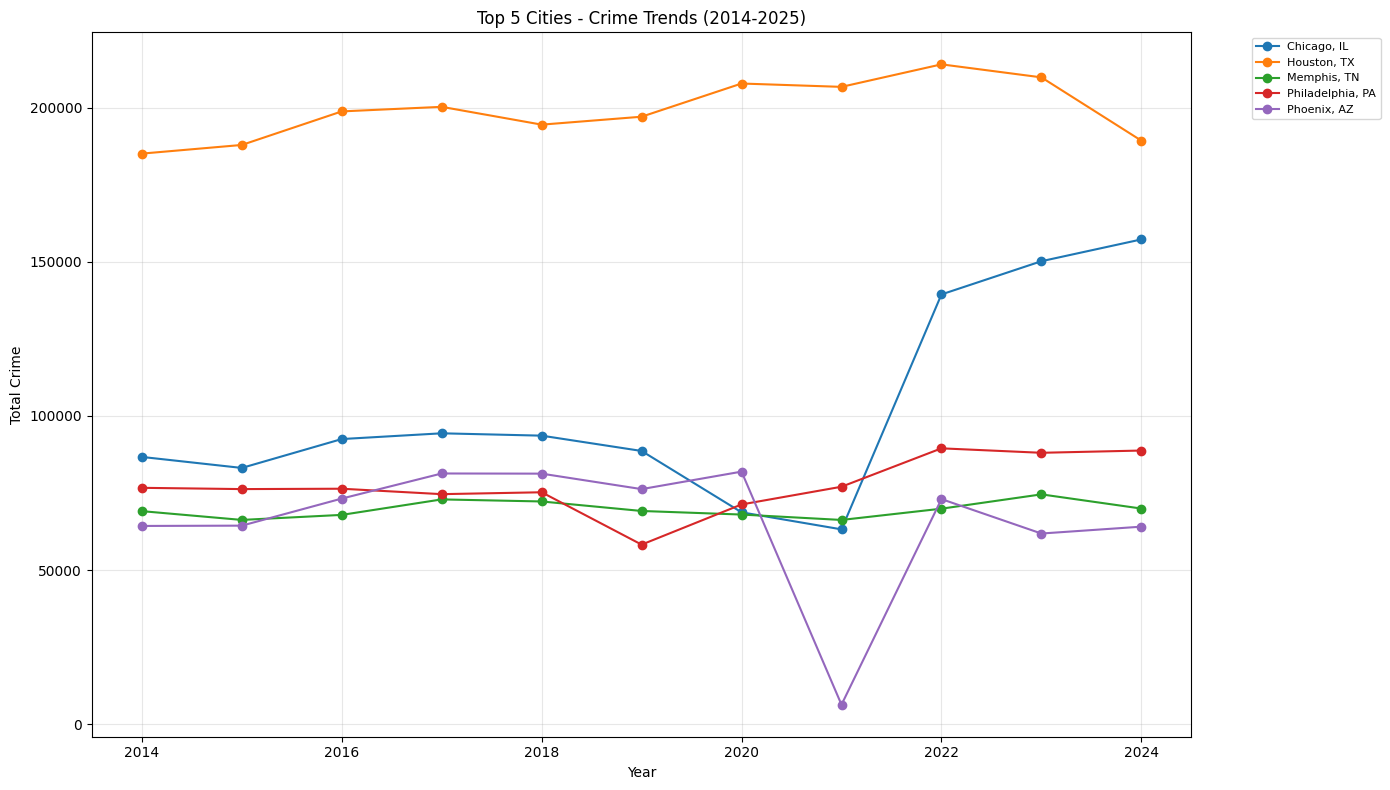

In [48]:
# Line graph showing Top 5 Cities with highest Crime by year
plt.figure(figsize=(14, 8))
for city in top_5_crime_values_df['city_state'].unique():
    city_data = top_5_crime_values_df[top_5_crime_values_df['city_state'] == city]
    plt.plot(city_data['year'], city_data['total_crime'], marker='o', label=city)

plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.title('Top 5 Cities - Crime Trends (2014-2025)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

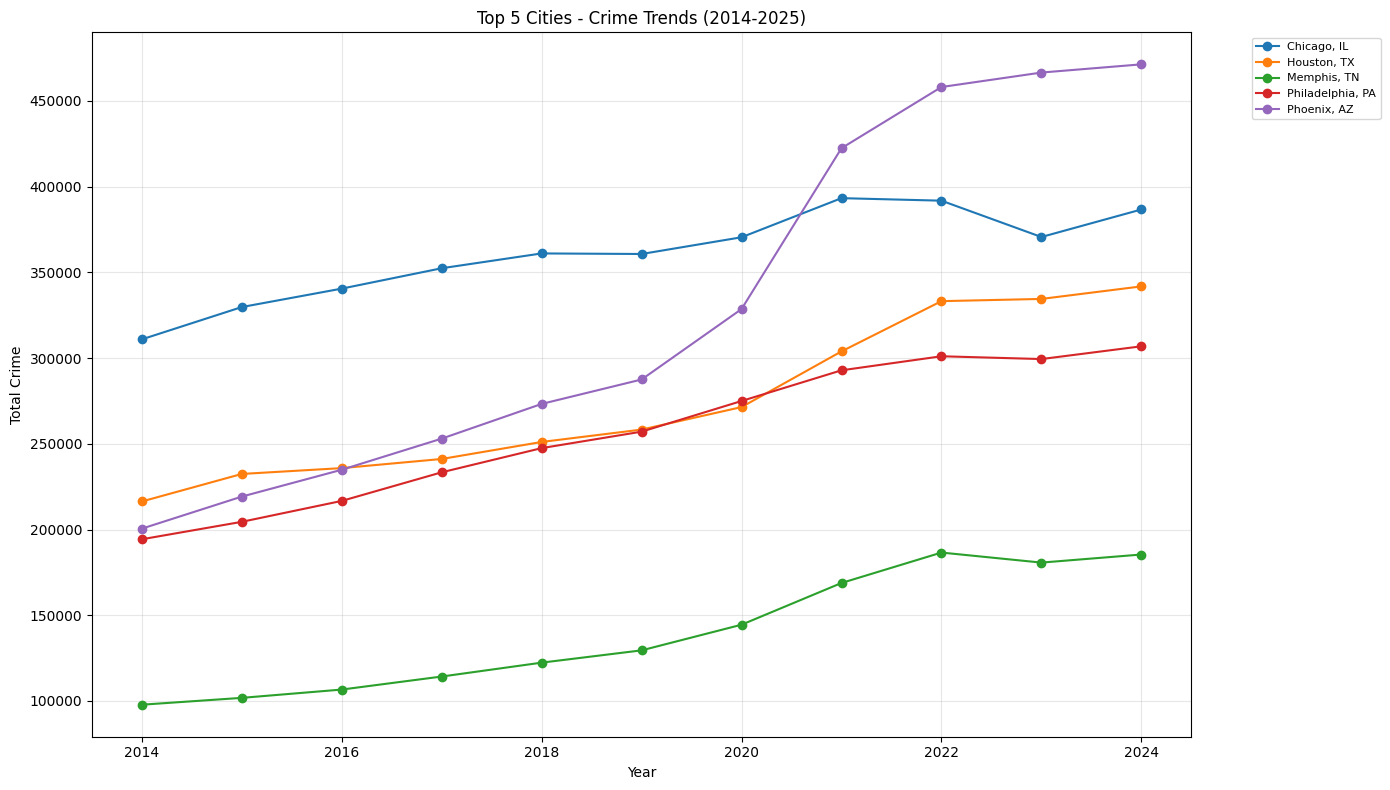

In [47]:
# Line graph showing the home value of Top 5 Cities with Crime by year
plt.figure(figsize=(14, 8))
for city in top_5_crime_values_df['city_state'].unique():
    city_data = top_5_crime_values_df[top_5_crime_df['city_state'] == city]
    plt.plot(city_data['year'], city_data['value'], marker='o', label=city)

plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.title('Top 5 Cities - Crime Trends (2014-2025)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

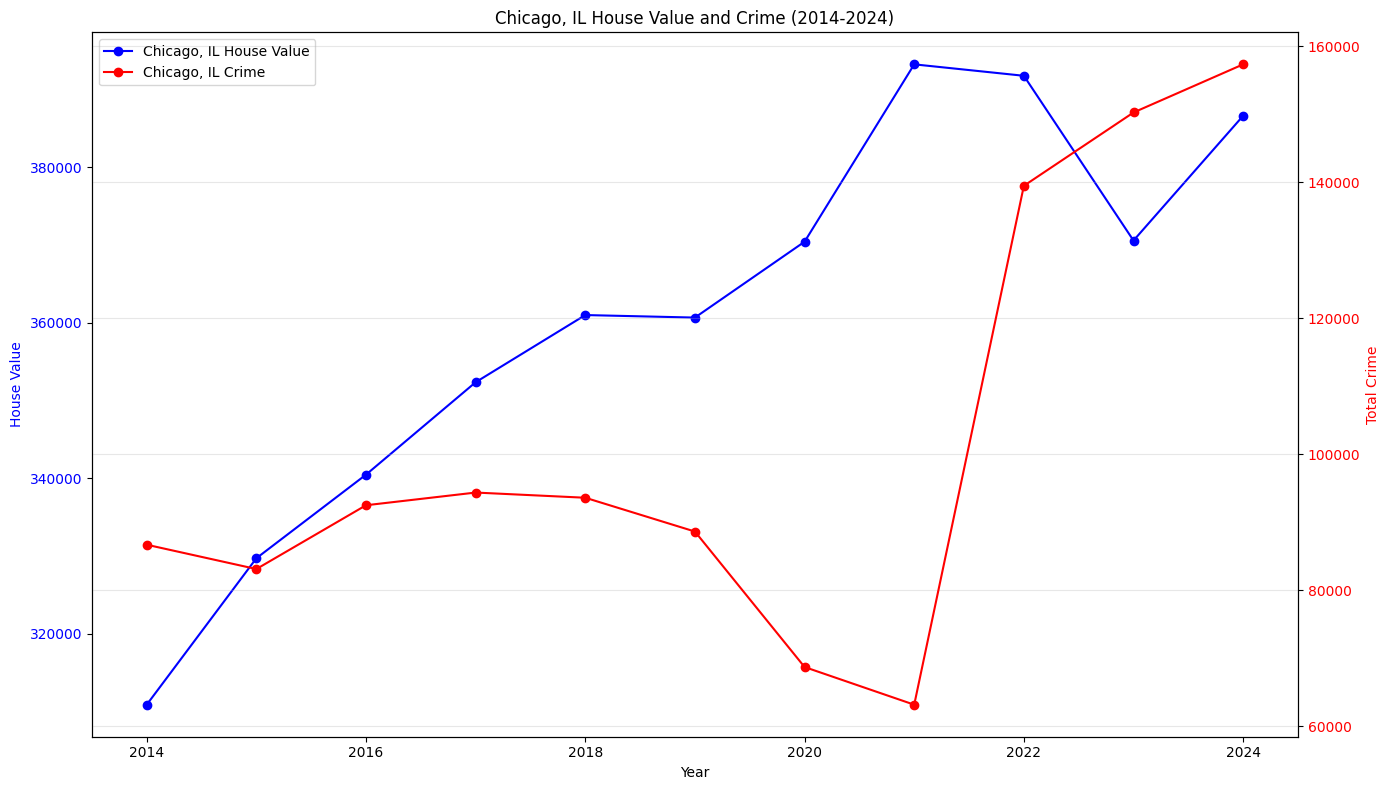

In [ ]:
# Dual-axis line graph for a specific city (e.g., Chicago, IL)

def plot_dual_axis_city(city_name):
    # 1. Define the city variable
    city = "Chicago, IL"
    city_data = top_5_crime_values_df[top_5_crime_values_df.city_state == city]

    # 2. Setup the figure and the first axis (for House Value)
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot House Value on the left axis (ax1)
    line1 = ax1.plot(city_data['year'], city_data['value'], marker='o', color='blue', label=f'{city} House Value')

    ax1.set_xlabel('Year')
    ax1.set_ylabel('House Value', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # 3. Setup the second axis (for Crime)
    ax2 = ax1.twinx()  

    # Plot Crime on the right axis (ax2)
    line2 = ax2.plot(city_data['year'], city_data['total_crime'], marker='o', color='red', label=f'{city} Crime')

    ax2.set_ylabel('Total Crime', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # 4. Final touches
    plt.title(f'{city} House Value and Crime (2014-2024)')
    plt.grid(True, alpha=0.3)

    # Combine legends from both axes
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')

    plt.tight_layout()
    plt.show()

In [40]:
# Get total_crime data for the same cities and years
top_5_crime_values_combined = final_df[final_df["city_state"].isin(top_5_crime_values.index)].groupby(["year", "city_state"])[["value", "total_crime"]].mean().reset_index()

In [ ]:
city_state["total_incidents"].plot(kind="box")
plt.ylim(0, 500)
plt.title("Total_Incidents Box Plot")